In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Reading

In [3]:
df_train = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/train.csv')
df_train

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Here, data source is not a important feature; so we should drop it. Also, there are a few null values in 'PH' feature so we can use dropna.

In [5]:
df_train = df_train.set_index(['seq_id'])
df_train = df_train.drop(['data_source'], axis=1)
df_train = df_train.dropna()
df_train

,protein_sequence,pH,tm
seq_id,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...
31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6


Let's check updates of train data

In [6]:
df_updt = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/train_updates_20220929.csv')
df_updt

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [7]:
df_updt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


As you can see, the amount of Nan values (missing data) is huge! First we drop data source column and then use dropna; Because we need all of data features for updating train data.

In [8]:
df_updt = df_updt.set_index(['seq_id'])
df_updt = df_updt.drop(['data_source'], axis=1)
df_updt = df_updt.dropna()
df_updt

,protein_sequence,pH,tm
seq_id,,,
973,DTSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,48.4
986,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVTFQNRESVLPT...,7.0,48.4
988,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,7.0,49.0
989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,55.6
1003,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESTLPT...,7.0,48.4
1012,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,48.4
1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,55.6
1018,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,49.0
1037,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,7.0,49.0


Finally, we replace old values with updated values and reset index to avoid future problems.

In [9]:
df_train.loc[df_updt.index] = df_updt
df_train.reset_index(inplace=True)
df_train

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31099,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31100,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31101,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31102,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31104 entries, 0 to 31103
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31104 non-null  int64  
 1   protein_sequence  31104 non-null  object 
 2   pH                31104 non-null  float64
 3   tm                31104 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 972.1+ KB


**IMPORTANT NOTICE**

The input of the model I want to design will be one-hot encoded amino acids of proteins. Therefore, it is necessary to have the same number(one-hot) for each amino acid in the train set and the submission test set. As a result, I separate 6000 data points for training and evalueting the model and concatenate them with 2413 data points of submission.

In [11]:
df_test = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/test.csv')
df_test = df_test.drop(['data_source'], axis=1)
df_test

,seq_id,protein_sequence,pH
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8


In [12]:
df = pd.concat([df_train[:6000], df_test])
df

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,NaN
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,NaN
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,NaN
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,NaN


# Data preprocessing 

I want to treat sequence of amino acids(proteins) like words of a sentence; convert letters(amino acids) to lower case, split them and add them to a list.

In [13]:
protein_seq = df['protein_sequence']
amino_acid_seq = []
for protein in protein_seq:
    prt = protein.lower()
    prt = " ".join(prt)
    amino_acid_seq.append(prt)

In [14]:
#just for example
amino_acid_seq[0]

'a a a a k a a a l a l l g e a p e v v d i w l p a g w r q p f r v f r l e r k g d g v l v g m i k d a g d d p d v t h g a e i q a f v r f a s e d r l e g g e g v g v v t k p g l g v p v g e p a i n p v p r r m i w e a v r e v t e r p l a v t i a i p g g e e l a k k t l n p r l g i l g g l s v l g t t g v v k p y s t s a f r m s v v q a v g v a r a n g l l e i a a t t g g k s e r f a q r l l p h l p e m a f i e m g d f v g d v l r a a r k v g v e v v r v v g m i g k i s k m a d g k t m t h a a g g e v n l s l l l s l l k e a g a s p k a l k e a e g a a t a r r f l e i a l e e g l e l f f v n l v r l a q e k l q a y i g e r p f v s v a l t d f d e g r c l a a w p d r e v y r'

**Now we can tokenize letters (amino acieds) bcause we need 2 thing:**

first, maximum number of unique letters(amino acids)

second, maximum length of protein(seq of amino acids)

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(amino_acid_seq)
amino_acid_size = len(list(set(tokenizer.word_index)))
max_amino_acid_len = max(len(acs.split()) for acs in amino_acid_seq)
print('number of unique amino acids = ', amino_acid_size, '\n')
print('max len of protein = ', max_amino_acid_len)

number of unique amino acids =  20 

max len of protein =  7405


Finally, we apply one-hot encoding to proteins(sequence of amino acids); all of 20 unique amino acids in a protein represent with an integer number 1 to 20. Then, since the size of the proteins (the number of sequenced amino acids) is different, we have to use padding.

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

onehot_reprsnt = [one_hot(protein,amino_acid_size)for protein in amino_acid_seq]
embedded_prtns = pad_sequences(onehot_reprsnt, padding='post', maxlen=max_amino_acid_len)

**What we've got for now?!**

In [17]:
#just for example
print('first protein of train set(seq of amino acids):\n', amino_acid_seq[0])
print('\none-hot representation of first protein:\n', onehot_reprsnt[0])
print('\npadding version of first protein:\n', embedded_prtns[0])

first protein of train set(seq of amino acids):
 a a a a k a a a l a l l g e a p e v v d i w l p a g w r q p f r v f r l e r k g d g v l v g m i k d a g d d p d v t h g a e i q a f v r f a s e d r l e g g e g v g v v t k p g l g v p v g e p a i n p v p r r m i w e a v r e v t e r p l a v t i a i p g g e e l a k k t l n p r l g i l g g l s v l g t t g v v k p y s t s a f r m s v v q a v g v a r a n g l l e i a a t t g g k s e r f a q r l l p h l p e m a f i e m g d f v g d v l r a a r k v g v e v v r v v g m i g k i s k m a d g k t m t h a a g g e v n l s l l l s l l k e a g a s p k a l k e a e g a a t a r r f l e i a l e e g l e l f f v n l v r l a q e k l q a y i g e r p f v s v a l t d f d e g r c l a a w p d r e v y r

one-hot representation of first protein:
 [4, 4, 4, 4, 2, 4, 4, 4, 17, 4, 17, 17, 13, 3, 4, 16, 3, 1, 1, 17, 7, 4, 17, 16, 4, 13, 4, 14, 2, 16, 18, 14, 1, 18, 14, 17, 3, 14, 2, 13, 17, 13, 1, 17, 1, 13, 3, 7, 2, 17, 4, 13, 17, 17, 16, 17, 1, 1, 8, 13, 4, 3, 7, 2, 4, 1

# Model Designing and Training

Here, I am going to design a model with two inputs; one head for processing sequence of amino acids (protein structure), another head for processing pH values.

2023-01-01 13:36:48.764219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 13:36:48.765210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 13:36:48.896910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 13:36:48.897881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 13:36:48.898751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7405)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 7405, 50)     1050        input_1[0][0]                    
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 7405, 50)     100         embedding[0][0]                  
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 7405, 512)    1153024     layer_normalization[0][0]        
______________________________________________________________________________________________

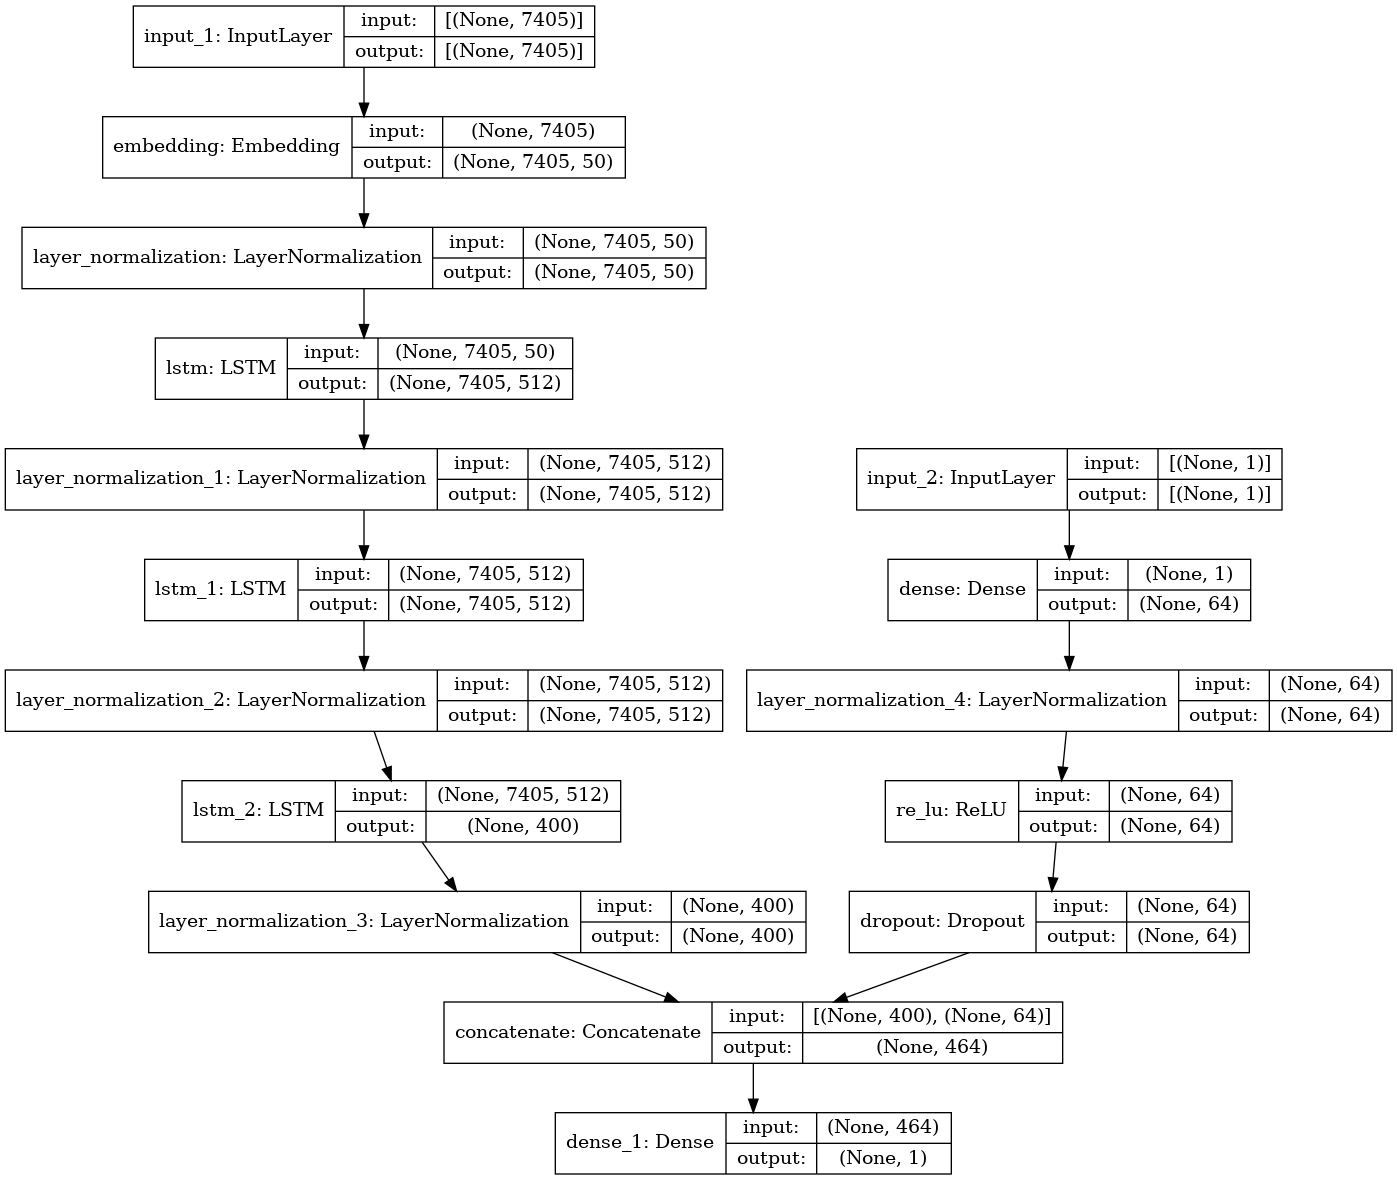

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, LSTM, ReLU, LayerNormalization, Dropout, concatenate
from tensorflow.keras.utils import plot_model


inputA = Input(shape=(max_amino_acid_len,))
x = Embedding(input_dim=amino_acid_size+1, output_dim=50, mask_zero=True)(inputA)
x = LayerNormalization()(x)
x = LSTM(512, return_sequences=True)(x)
x = LayerNormalization()(x)
x = LSTM(512, return_sequences=True)(x)
x = LayerNormalization()(x)
x = LSTM(400)(x)
x = LayerNormalization()(x)

inputB = Input(shape=(1,))
y = Dense(64)(inputB)
y = LayerNormalization()(y)
y = ReLU()(y)
y = Dropout(0.2)(y)

combined = concatenate([x,y])
z = Dense(1, activation="linear")(combined)

model = Model(inputs=[inputA, inputB], outputs=z)
model.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
    
model.summary()
plot_model(model, show_shapes=True)

Since we are facing problems of lack of RAM, it is better to use a data generation to feed the model.

In [19]:
def data_generator(data_frame, embedded_data, batch_size):
    x1, x2, y = [], [], []
    n = 0
    while True:
        for i in range(len(data_frame)):
            n += 1
            x1.append(embedded_data[i])
            x2.append(data_frame['pH'][i])
            y.append(data_frame['tm'][i])
            
            if n == batch_size:
                x1, x2, y = np.array(x1), np.array(x2), np.array(y)
                yield [x1,x2], y
                x1, x2, y = [], [], []
                n = 0 

In [20]:
def train(data_frame, embedded_data, epochs, batch_size):
    steps = len(data_frame) // batch_size
    for i in range(epochs):
        generator = data_generator(data_frame, embedded_data, batch_size)
        model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

I have to use only 6000 of data points for training the model because of lack of RAM.

In [21]:
train_set = df[:5000]

train(train_set, embedded_prtns, epochs=10, batch_size=32)

2023-01-01 13:36:56.689466: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-01 13:37:09.205163: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


156/156 [==============================] - 87s 558ms/step - loss: 123.1013 - root_mean_squared_error: 11.0951


# Model Testing

Here, I am going to use 1000 data points as test set for avalueting the model.

In [28]:
def data_for_model(data, embedded_docs, lower_range, upper_range):
    ac_seq = embedded_docs[lower_range:upper_range] 
    protein_ph = data['pH'][lower_range:upper_range] 
    X = [ac_seq, np.array(protein_ph)]
    y = np.array(data['tm'][lower_range:upper_range])
    
    return X, y

In [29]:
X_test, y_test = data_for_model(df, embedded_prtns, 5000, 6000)
y_pred = model.predict(X_test)

test_df = df[5000:6000]
test_df['prediction_tm'] = np.squeeze(y_pred)
test_df

,seq_id,protein_sequence,pH,tm,prediction_tm
5000,5001,MAKRQTWEQMRQIFVQAVNAVHPEKVFADFQKFDLRPQIGENATDI...,7.0,41.5,47.954834
5001,5002,MAKRRQKKRTHAQITPEQERDIPKSMVIRVGQTSLANHSLNQLVKD...,7.0,44.8,47.954823
5002,5003,MAKRSRTKLSKTERQQAEQQQAEQKKDQIELGVGEQQDHFTVLLHE...,7.0,41.5,47.954830
5003,5004,MAKRSSLSIRIVEGKNLPAKDITGSSDPYCIVKVDNEPIIRTATVW...,7.0,45.7,47.954788
5004,5005,MAKRTKKVGITGKYGVRYGSSLRRQVKKLEIQQHARYDCSFCGKKT...,7.0,42.2,47.954849
...,...,...,...,...,...
5995,5996,MARMNRPAPVEVTYKNMRFLITHNPTNATLNKFIEELKKYGVTTIV...,7.0,50.8,47.954807
5996,5997,MARNEPSSQQPSSSGSNGTPAQQNGSAKPSKVTVKVVNASFTKAAD...,7.0,39.9,47.954838
5997,5998,MARNKPLGLKIRLMKAVKSNRRVPGWVMVKTDRRVTQNYKRRNWRR...,7.0,87.4,47.954800
5998,5999,MARNPEEAQRVVIPLGSEEALAFLGQADRNLKRLRSLFRTYLGDEV...,7.0,91.1,47.954872


# Submission

In [30]:
X_sub, _ = data_for_model(df, embedded_prtns, 6000, len(df))
y_pred = model.predict(X_sub)

df_submission = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/sample_submission.csv')
df_submission['tm'] = np.squeeze(y_pred)
df_submission

,seq_id,tm
0,31390,47.948395
1,31391,47.948395
2,31392,47.948395
3,31393,47.948395
4,31394,47.948395
...,...,...
2408,33798,47.948399
2409,33799,47.948399
2410,33800,47.948399
2411,33801,47.948399
